# Curves

### Examples

2. **Circle in horizontal plane**. The parametric equation $x=a\cos{t},\ y=a\sin{t},\ z=b$ represent the circle of radius $a$ in the horizontal plane passing $z=b$ on z-axis.

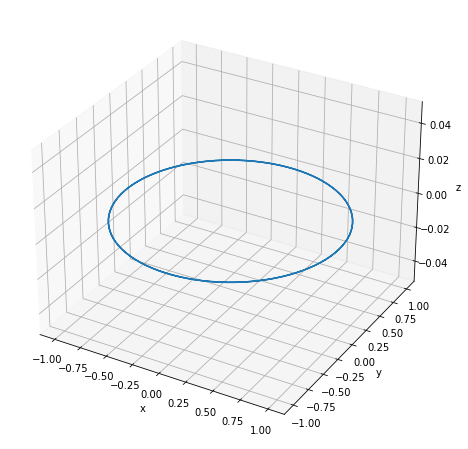

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2*np.pi, 2*np.pi, 100)
a = 1.0
b = 0.0

x = a * np.cos(t)
y = a * np.sin(t)
z = np.ones_like(x) * b

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

3. **Ellipse in a plane**. Consider the intersection of a cylinder and a plane. The intersection is an ellipse. For example, if we consider a cylinder with circular base $x=a\cos{t},\ y=a\sin{t}$ and the equation of the plane is $mx+ny+kz=l$ with $k\neq 0$, the parametric equations of ellipse can be obtained by solving the equation of plane for $z$ and using the equations for $x$ and $y$ to obtain the equation of $z$ in parametric form. Thus $z=\frac{1}{k}(l-mx-ny)$.

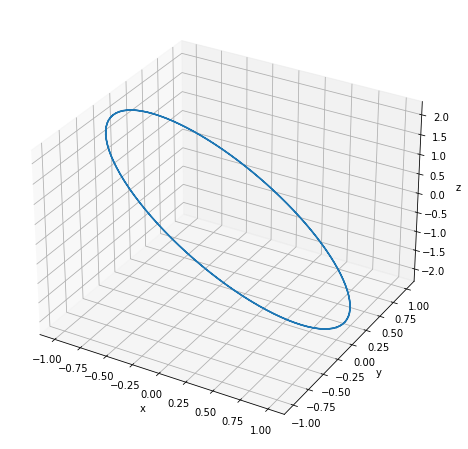

In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-2*np.pi, 2*np.pi, 100)
a = 1.0
m = 2.0
n = 1.0
k = 1.0
l = 0.0

x, y = a*np.cos(t), a*np.sin(t)
z = 1/k * (l - m*x - n*y)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

4. **Circular helix**. A curve with equations $x=a\cos{t},\ y=a\sin{t},\ z=bt$ is the curve spiraling around the cylinder with base circle $x=a\cos{t},\ y=a\sin{t}$.

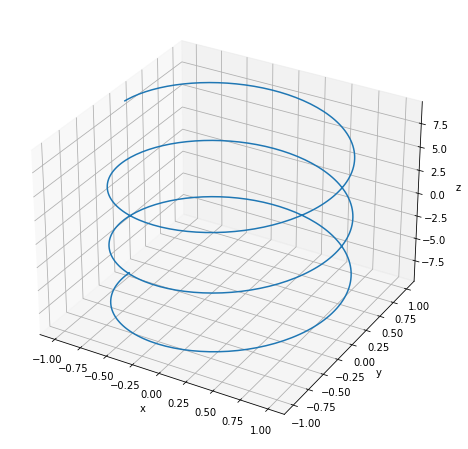

In [19]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-3*np.pi, 3*np.pi, 500)
a = 1.0
b = 1.0

x, y, z = a*np.cos(t), a*np.sin(t), b*t

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Tangent Vector and the Arc Length

**Example 1.** The line with parametric equations
$$
\begin{align*}
x&=1+2t\\
y&=2+4t\\
z&=3-2t
\end{align*}
$$
can also be represented as
$$
\begin{align*}
x&=1+s\\
y&=2+2s\\
z&=3-s
\end{align*}
$$
with $s=2t$ being the relation between the two parameters just as in the figure above. Further, it can also be represented as
$$
\begin{align*}
x&=3-2u\\
y&=6-4u\\
z&=1+2u
\end{align*}
$$
with $u=1-t$ being the relation between the parameters in the first and the last parametrization, again just as in the figure above.

This shows that seemingly different parametric equations can be describing the **same line**. When thinking of a line as the trajectory of an object and the parameter as the time, the different parametrization represent the fact that different particles traveling on the same (straight) path but with different speeds and possibly in the opposite orientation are still moving along the same path.

With this in mind, the particle in parametrization
$$
\begin{align*}
x&=1+2t\\
y&=2+4t\\
z&=3-2t
\end{align*}
$$
travels twice as fast than the particle in parametrization
$$
\begin{align*}
x&=1+s\\
y&=2+2s\\
z&=3-s
\end{align*}
$$
A third particle with the trajectory given by
$$
\begin{align*}
x&=3-2u\\
y&=6-4u\\
z&=1+2u
\end{align*}
$$
has the different initial point and it is traveling in different orientation than the first two but all three particles are traveling along the same path.

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)


def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

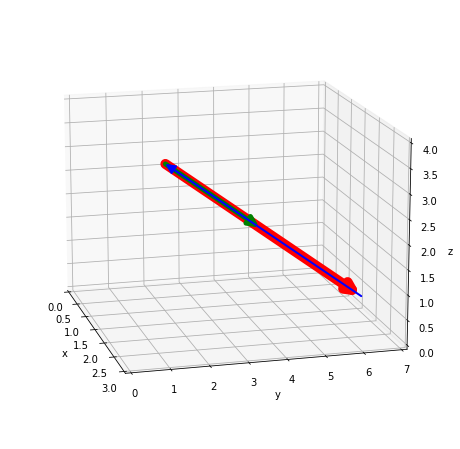

In [53]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([0, 1])
x1, y1, z1 = 1 + 2*t, 2 + 4*t, 3 - 2*t

s = np.array([0, 1])
x2, y2, z2 = 1 + s, 2 + 2*s, 3 - s

u = np.array([0, 1])
x3, y3, z3 = 3 - 2*u, 6 - 4*u, 1 + 2*u

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.arrow3D(x1[0], y1[0], z1[0], 
        x1[1]-x1[0], y1[1]-y1[0], z1[1]-z1[0], 
        mutation_scale=20, arrowstyle="-|>", fc='r', color='r', linewidth=10)
ax.arrow3D(x2[0], y2[0], z2[0],
        x2[1]-x2[0], y2[1]-y2[0], z2[1]-z2[0],
        mutation_scale=20, arrowstyle="-|>", fc='g', color='g', linewidth=5)
ax.arrow3D(x3[0], y3[0], z3[0],
        x3[1]-x3[0], y3[1]-y3[0], z3[1]-z3[0],
        mutation_scale=20, arrowstyle="-|>", fc='b', color='b', linewidth=2)
ax.set_xlim(0, 3)
ax.set_ylim(0, 7)
ax.set_zlim(0, 4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(15, -15)
plt.show()

The arc-length parametrization of the line is:


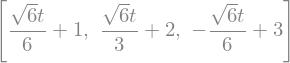

In [116]:
# Example 1.

from sympy import *

t = symbols('t')
init_printing()

line = (1 + t, 2 + 2 * t, 3 - t)

s = integrate(sqrt(diff(line[0])**2 + diff(line[1])**2 + diff(line[2])**2), (t, 0, t))
# s = sqrt(6) * t
# t = s / sqrt(6)
coeff = s.coeff(t)

line = [x.subs(t, t/coeff) for x in line]
print('The arc-length parametrization of the line is:')
line

### Practice problems.

3. Find the equation of tangent line at the point where $t=0$. Find also the unit tangent vector $\mathbf{T}$ as function of parameter $t$.

(a) Line $x=1+t,\ y=2-2t,\ z=1+2t$.

(b) Circle in a horizontal plane $x=\cos{t},\ y=\sin{t},\ z=2$.

(c) Circular helix $x=\cos{t},\ y=\sin{t},\ z=t$.

(d) Ellipse in the intersection of the cylinder $x^2+y^2=1$ with the plane $y+z=2$ (find parametric equations before finding the tangent line).

In [63]:
# (a)

from sympy import *

t = symbols('t')
init_printing()

x, y, z = 1 + t, 2 - 2*t, 1 + 2*t

tangent_line = (x.subs(t, 0) + diff(x).subs(t, 0) * t,
                y.subs(t, 0) + diff(y).subs(t, 0) * t,
                z.subs(t, 0) + diff(z).subs(t, 0) * t)
print('Tangent line:')
tangent_line

Tangent line:


Unit tagent vector = 


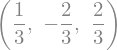

In [64]:
ts = sqrt(diff(x)**2 + diff(y)**2 + diff(z)**2)

T = (diff(x)/ts, diff(y)/ts, diff(z)/ts)
print('Unit tagent vector = ')
T

In [65]:
# (b)

from sympy import *

t = symbols('t')
init_printing()

x, y, z = cos(t), sin(t), 2

tangent_line = (x.subs(t, 0) + diff(x).subs(t, 0) * t,
                y.subs(t, 0) + diff(y).subs(t, 0) * t,
                z + diff(z) * t)
print('Tangent line:')
tangent_line

Tangent line:


In [66]:
ts = simplify(sqrt(diff(x)**2 + diff(y)**2 + diff(z)**2))

T = (diff(x)/ts, diff(y)/ts, diff(z)/ts)
print('Unit tagent vector = ')
T

Unit tagent vector = 


In [67]:
# (c)

from sympy import *

t = symbols('t')
init_printing()

x, y, z = cos(t), sin(t), t

tangent_line = (x.subs(t, 0) + diff(x).subs(t, 0) * t,
                y.subs(t, 0) + diff(y).subs(t, 0) * t,
                z.subs(t, 0) + diff(z).subs(t, 0) * t)
print('Tangent line:')
tangent_line

Tangent line:


Unit tagent vector = 


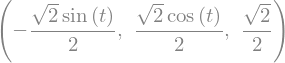

In [68]:
ts = simplify(sqrt(diff(x)**2 + diff(y)**2 + diff(z)**2))

T = (diff(x)/ts, diff(y)/ts, diff(z)/ts)
print('Unit tagent vector = ')
T

In [69]:
# (d)

from sympy import *

t = symbols('t')
s = symbols('s')
init_printing()

x, y, z = cos(t), sin(t), 2 - sin(t)

tangent_line = (x.subs(t, 0) + diff(x).subs(t, 0) * t,
                y.subs(t, 0) + diff(y).subs(t, 0) * t,
                z.subs(t, 0) + diff(z).subs(t, 0) * t)
print('Tangent line:')
tangent_line

Tangent line:


Unit tagent vector = 


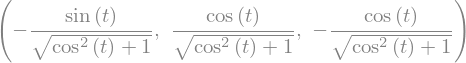

In [70]:
ts = simplify(sqrt(diff(x)**2 + diff(y)**2 + diff(z)**2))

T = (diff(x)/ts, diff(y)/ts, diff(z)/ts)
print('Unit tagent vector = ')
T

4. Consider the curve $C$ which is the intersection of the surfaces $x^2+y^2=9$ and $z=1-y^2$.

(a) Find the parametric equations that represent the curve $C$.

(b) Find the equation of the tangent line to the curve $C$ at point $(0,3,-8)$.

In [71]:
from sympy import *

t = symbols('t')
init_printing()

# (a)
x, y, z = 3 * cos(t), 3 * sin(t), 1 - 9 * sin(t)**2

# (b)
t0 = pi / 2
tangent_line = (x.subs(t, t0) + diff(x).subs(t, t0) * t,
                y.subs(t, t0) + diff(y).subs(t, t0) * t,
                z.subs(t, t0) + diff(z).subs(t, t0) * t)
print('Tangent line:')
tangent_line

Tangent line:


5. Consider the curve $C$ which is the intersection of the surfaces $y^2+z^2=16$ and $x=8-y^2-z$.

(a) Find the parametric equations that represent the curve $C$.

(b) Find the equation of the tangent line to the curve $C$ at point $(-8,-4,0)$.

In [72]:
from sympy import *

t = symbols('t')
init_printing()

# (a)
x, y, z = 8 - 16 * cos(t)**2 - 4 * sin(t), 4 * cos(t), 4 * sin(t)

# (b)
t0 = pi
tangent_line = (x.subs(t, t0) + diff(x).subs(t, t0) * t,
                y.subs(t, t0) + diff(y).subs(t, t0) * t,
                z.subs(t, t0) + diff(z).subs(t, t0) * t)
print('Tangent line:')
tangent_line

Tangent line:


6. Consider the helix $x=a\cos{t},\ y=a\sin{t},\ z=at$.

(a) Find the arc length of the helix for $0\leq t\leq 2\pi$ using the given parametrization.

(b) Parametrize the helix by the arc length.

(c) Find the arc length of the helix for $0\leq t\leq 2\pi$ using the arc-length parametrization.

In [73]:
from sympy import *

t = symbols('t')
a = symbols('a', positive=True)
s = symbols('s')
init_printing()

x, y, z = a * cos(t), a * sin(t), a * t

# (a)
L = integrate(sqrt(diff(x, t)**2 + diff(y, t)**2 + diff(z, t)**2), (t, 0, 2*pi))
print('The arc length = ')
L

The arc length = 


The helix parametrized by the arc length: 


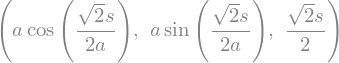

In [74]:
# (b)
ts = simplify(
    integrate(sqrt(diff(x, t)**2 + diff(y, t)**2 + diff(z, t)**2), (t, 0, t)))
# s = sqrt(2) * a * t
coeff = ts.coeff(t)

print('The helix parametrized by the arc length: ')
(x.subs(t, s/coeff), y.subs(t, s/coeff), z.subs(t, s/coeff))

In [75]:
# (c)
# when t = 0, s = 0
# when t = 2 * pi, s = 2 * pi * sqrt(2) * a
L = integrate(1, (s, 0, 2 * pi * sqrt(2) * a))
print('The arc length of the helix using the arc-length parametrization: ')
L

The arc length of the helix using the arc-length parametrization: 


7. Parametrize the curve $x=e^t\cos{t},\ y=e^t\sin{t},\ z=e^t$ by the arc length.

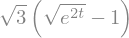

In [76]:
from sympy import *

t = symbols('t')
init_printing()

x, y, z = exp(t)*cos(t), exp(t)*sin(t), exp(t)

s = simplify(integrate(sqrt(diff(x, t)**2 + diff(y, t)**2 + diff(z, t)**2), (t, 0, t)))
# s = sqrt(3) * (exp(t) - 1)
# exp(t) = s / sqrt(3) + 1 = 1/sqrt(3) * (s + sqrt(3))
# t = ln(1/sqrt(3) * (s + sqrt(3)))
s

## Acceleration Vector and Curvature

Consider the special case when the curve is parametrized with respect to arc length $s$. In this case, `the length of the acceleration vector` is called **the curvature**
$$
\kappa(s)=|\mathbf{T}'(s)|=|\gamma''(s)|
$$

In [78]:
# Example 1.

from sympy import *

x0, y0, z0, a, b, c, t, s = symbols('x0, y0, z0, a, b, c, t, s')
init_printing()

x, y, z = x0 + a*t, y0 + b*t, z0 + c*t

ts = integrate(sqrt(diff(x, t)**2 + diff(y, t)**2 + diff(z, t)**2), (t, 0, t))
print('s = ')
ts
# s = sqrt(a**2 + b**2 + c**2) * t
# t = s / sqrt(a**2 + b**2 + c**2)

s = 


T = 


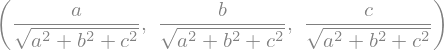

In [79]:
coeff = ts.coeff(t)
x, y, z = x.subs(t, s/coeff), y.subs(t, s/coeff), z.subs(t, s/coeff)
T = (diff(x, s), diff(y, s), diff(z, s))
print('T = ')
T
# T = 1/sqrt(a**2 + b**2 + c**2) * (a, b, c)

In [82]:
Tprime = (diff(T[0], s), diff(T[1], s), diff(T[2], s))
print("T' = ", Tprime)
# T' = (0, 0, 0)
kappa = sqrt(Tprime[0]**2 + Tprime[1]**2 + Tprime[2]**2)
print('kappa = ', kappa)
# kappa = 0

T' =  (0, 0, 0)
kappa =  0


In [83]:
# Example 2.

from sympy import *

t, s = symbols('t, s')
a = symbols('a', positive=True)
init_printing()

x, y = a*cos(t), a*sin(t)

ts = simplify(integrate(sqrt(diff(x, t)**2 + diff(y, t)**2), (t, 0, t)))
print('s = ')
ts
# s = a * t
# t = a / s

s = 


T = 


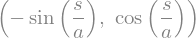

In [84]:
coeff = ts.coeff(t)

x, y = x.subs(t, s/coeff), y.subs(t, s/coeff)
T = (diff(x, s), diff(y, s))
print('T = ')
T
# T = (-sin(s/a), cos(s/a))

T' = 


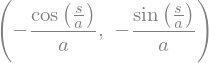

In [85]:
Tprime = (diff(T[0], s), diff(T[1], s))
print("T' = ")
Tprime
# T' = (-cos(s/a)/a, -sin(s/a)/a)

In [86]:
kappa = simplify(sqrt(Tprime[0]**2 + Tprime[1]**2))
print('kappa = ')
kappa
# kappa = 1 / a

kappa = 


**The curvature in non-unit-speed parametrizations.**
$$
\kappa=\frac{|\gamma'\times\gamma''|}{|\gamma'|^3}
$$

**Claim 1.** Let $\mathbf{v}(t)$ be a vector function and $c$ be a constant. Then $\mathbf{v}$ has constant length if and only if $\mathbf{v}$ and $\mathbf{v}'$ are orthogonal. This statement can be written by formulas as
$$
|\mathbf{v}|=\text{constant}\quad\quad\text{if and only if}\quad \mathbf{v}'\cdot \mathbf{v}=0
$$

The unit vector in the direction of $\mathbf{T}'$ is called the **principal normal vector** and is denoted by $\mathbf{N}$. Thus,
$$
\mathbf{N}(s)=\frac{\mathbf{T}'(s)}{|\mathbf{T}'(s)|}=\frac{\mathbf{T}'(s)}{\kappa(s)}
$$
Recall that $\mathbf{T}'$ and $\mathbf{T}$ are orthogonal and so **$\mathbf{N}$ and $\mathbf{T}$ are orthogonal**.

The plane determined by vectors $\mathbf{T}$ and $\mathbf{N}$ is called the **osculating plane**. If curve is planar, this plane is the plane in which curve lies. The name osculating comes from the following construction. At a point on the curve, consider the circle of radius $\frac{1}{\kappa}$ with the same tangent as the curve and with the center on the normal direction line. Thus, it lies in the osculating plane.

This circle is called the **osculating circle**. The name comes from Latin word osculari means to kiss (osculum meaning kiss) and refers to the fact that curve and osculating circle are tangential curves.

The osculating circle is an approximation of the curve with a circle at a point - it has the same curvature, tangent and normal vector as the curve at a point. The center of the circle can be computed by the formula
$$
\gamma+\frac{1}{\kappa}\mathbf{N}
$$

Consider the cross product of $\mathbf{T}$ and $\mathbf{N}$.
$$
B=T\times N
$$
This vector is called the **binormal vector**. By definition, $\mathbf{B}$ is perpendicular both to $\mathbf{T}$ and $\mathbf{N}$ and has unit length also since $\mathbf{T}$ and $\mathbf{N}$ are of unit length. The plane determined by $\mathbf{N}$ and $\mathbf{B}$ is called the **normal plane**. All the lines in the normal plane are perpendicular to the tangent vector.

Vector $\mathbf{B}$ indicates **the direction in which the curve departs from being a planar curve**.

The triple $\mathbf{T}, \mathbf{N}, \mathbf{B}$ is called the **moving frame**. The moving frame $\mathbf{T}, \mathbf{N}, \mathbf{B}$ is an orthonormal basis meaning that each vector is of unit length, that each two are perpendicular and that every other vector can be uniquely represented as a linear combination of these three. This means that they take over the role of the usual basis vectors $i = (1, 0, 0), j = (0, 1, 0), k = (0, 0, 1)$, at a point on the curve.

**Torsion.** While $\mathbf{B}$ indicates the direction in which the curve departs from being a planar curve, the **torsion** $\tau$ measures the **extent at which the curve departs from being a plane curve**, that is, it measures **how much the curve departs from the osculating plane**. Torsion $\tau$ can be computed via $\mathbf{N}$ and $\mathbf{B}$ as follows.

Recall that $\mathbf{B}$ is defined as $\mathbf{T}\times\mathbf{N}$. Differentiating with respect to $s$ we obtain $\mathbf{B}'=\mathbf{T}'\times\mathbf{N}+\mathbf{T}\times\mathbf{N}'$. Substituting that $\mathbf{T}'=\kappa\mathbf{N}$ and noting that $\mathbf{N}\times\mathbf{N}=0$, we obtain that $\mathbf{B}'=0+\mathbf{T}\times\mathbf{N}'$. Thus, $\mathbf{B}'$ is orghogonal to both $\mathbf{T}$ and $\mathbf{N}'$. On the other hand, $\mathbf{N}$ is also orthogonal to $\mathbf{T}$ and $\mathbf{N}'$. We already noted that $\mathbf{N}$ is orthogonal to $\mathbf{T}$, and $\mathbf{N}$ and $\mathbf{N}'$ are orthogonal by Claim 1. So, $\mathbf{B}'$ and $\mathbf{N}$ are orthogonal to the same two vectors and that makes them colinear. Hence, $\mathbf{B}'$ is a **multiple of $\mathbf{N}$**. The proportionality constant is denoted by $-\tau(s)$ and so
$$
\mathbf{B}'=-\tau\mathbf{N}
$$
Let us (dot) multiply each side of the equation $\mathbf{B}'=-\tau\mathbf{N}$ by $\mathbf{N}$. This gives us that the torsion $\tau$ can be computed as
$$
\tau=-\mathbf{B}'\cdot\mathbf{N}
$$
For a plane curve, the curve lies in the osculating plane, thus $\tau=0$. If $\tau>0$, the curve twists towards the side that $\mathbf{B}$ points to. If $\tau<0$, the curve twists away from the side that $\mathbf{B}$ points to.

**Example**. Reparametrizing by the arc length first, compute the curvature, torsion and the moving frame of the helix $(a\cos{t},a\sin{t},at)$.

The arc-length parametrization of the helix is: 


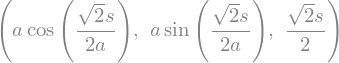

In [44]:
from sympy import *

t, s = symbols('t, s')
a = symbols('a', positive=True)
init_printing()

x, y, z = a * cos(t), a * sin(t), a * t

ts = simplify(integrate(sqrt(diff(x, t)**2 + diff(y, t)**2 + diff(z, t)**2), (t, 0, t)))
# s = sqrt(2) * a * t
# t = s / (sqrt(2) * a)
coeff = ts.coeff(t)

x, y, z = x.subs(t, s/coeff), y.subs(t, s/coeff), z.subs(t, s/coeff)
print("The arc-length parametrization of the helix is: ")
(x, y, z)

T = 


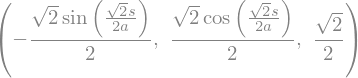

In [45]:
T = (simplify(diff(x, s)), simplify(diff(y, s)), simplify(diff(z, s)))
print("T = ")
T

T' = 


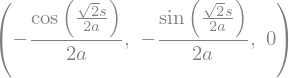

In [46]:
Tprime = (simplify(diff(T[0], s)), simplify(
    diff(T[1], s)), simplify(diff(T[2], s)))
print("T' = ")
Tprime

In [48]:
kappa = simplify(sqrt(Tprime[0]**2 + Tprime[1]**2 + Tprime[2]**2))
kappa

N = 


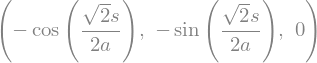

In [49]:
N = (Tprime[0]/kappa, Tprime[1]/kappa, Tprime[2]/kappa)
print("N = ")
N

B = 


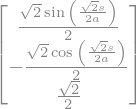

In [57]:
B = simplify(Matrix(T).cross(Matrix(N)))
print("B = ")
B

In [60]:
Bprime = diff(B, s)
tau = simplify(-Bprime.dot(N))
print("tau = ")
tau

tau = 


**Non-unit-speed parametrization formulas.** In case when it is hard to find the unit-speed parametrization, it may be useful to have the formulas for $\mathbf{T},\mathbf{N},\mathbf{B},\kappa$ and $\tau$ given in terms of arbitrary parametrization. We have seen that $\mathbf{T}=\frac{\gamma'}{|\gamma'|}$ and that $\kappa=\frac{|\gamma'\times\gamma''|}{|\gamma'|^3}$ in this case. The formulas for $\mathbf{N},\mathbf{B}$ and $\tau$ in any parametrization are given below.
$$
\mathbf{T}=\frac{\gamma'}{|\gamma'|},\quad\kappa=\frac{|\gamma'\times\gamma''|}{|\gamma'|^3},\quad\mathbf{B}=\frac{\gamma'\times\gamma''}{|\gamma'\times\gamma''|},\quad\mathbf{N}=\mathbf{B}\times\mathbf{T},\quad\text{and}\quad\tau=\frac{(\gamma'\times\gamma'')\cdot\gamma'''}{|\gamma'\times\gamma''|^2}
$$

The formula for $\tau$ can be shortened using the following notation. Let $[\mathbf{a},\mathbf{b},\mathbf{c}]$ denotes the value of $3\times 3$ determinant with columns $\mathbf{a},\mathbf{b},\mathbf{c}$. Then $[\mathbf{a},\mathbf{b},\mathbf{c}]=(\mathbf{a}\times\mathbf{b})\cdot\mathbf{c}$ and so $\tau=\frac{[\gamma',\gamma'',\gamma''']}{|\gamma'\times\gamma''|^2}$.

**Example**. Using the given parametrization, compute the curvature, torsion and the moving frame of the helix $(a\cos{t}, a\sin{t}, at)$.

gamma' = 


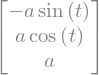

In [103]:
from sympy import *

t, s = symbols('t, s')
a = symbols('a', positive=True)
init_printing()

x, y, z = a * cos(t), a * sin(t), a * t
gamma_prime = Matrix([diff(x, t), diff(y, t), diff(z, t)])
print("gamma' = ")
gamma_prime

In [104]:
abs_gamma_prime = simplify(sqrt(sum(gamma_prime.applyfunc(lambda e: e**2))))
print("|gamma'| = ")
abs_gamma_prime

|gamma'| = 


gamma'' = 


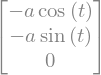

In [105]:
gamma_double_prime = diff(gamma_prime, t)
print("gamma'' = ")
gamma_double_prime

gamma' x gamma'' = 


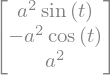

In [106]:
gamma_prime_times_gamma_double_prime = simplify(gamma_prime.cross(gamma_double_prime))
print("gamma' x gamma'' = ")
gamma_prime_times_gamma_double_prime

In [107]:
abs_gamma_prime_times_gamma_double_prime = simplify(sqrt(sum(gamma_prime_times_gamma_double_prime.applyfunc(lambda e: e**2))))
print("|gamma' x gamma''| = ")
abs_gamma_prime_times_gamma_double_prime

|gamma' x gamma''| = 


T = 


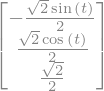

In [108]:
T = gamma_prime / abs_gamma_prime
print("T = ")
T

In [110]:
kappa = abs_gamma_prime_times_gamma_double_prime / abs_gamma_prime**3
print('kappa = ')
kappa

kappa = 


B = 


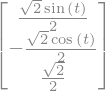

In [111]:
B = gamma_prime_times_gamma_double_prime / abs_gamma_prime_times_gamma_double_prime
print("B = ")
B

N = 


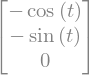

In [112]:
N = B.cross(T)
print("N = ")
N

In [115]:
gamma_triple_prime = diff(gamma_double_prime, t)

tau = simplify(gamma_prime_times_gamma_double_prime.dot(gamma_triple_prime) / abs_gamma_prime_times_gamma_double_prime**2)
print("tau = ")
tau

tau = 


### Practice Problems

1. Find the curvature of the twisted cubic $(t,t^2,t^3)$.

gamma' = 


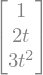

In [122]:
from sympy import *

t = symbols('t')
init_printing()

x, y, z = t, t**2, t**3

gamma_prime = diff(Matrix([x, y, z]))
print("gamma' = ")
gamma_prime

In [123]:
abs_gamma_prime = sqrt(sum(gamma_prime.applyfunc(lambda e: e**2)))
print("|gamma'| = ")
abs_gamma_prime

|gamma'| = 


gamma'' = 


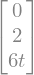

In [124]:
gamma_double_prime = diff(gamma_prime)
print("gamma'' = ")
gamma_double_prime

gamma' x gamma'' = 


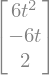

In [125]:
gamma_prime_times_gamma_double_prime = gamma_prime.cross(gamma_double_prime)
print("gamma' x gamma'' = ")
gamma_prime_times_gamma_double_prime

In [126]:
abs_gamma_prime_times_gamma_double_prime = simplify(
    sqrt(sum(gamma_prime_times_gamma_double_prime.applyfunc(lambda e: e**2))))
print("|gamma' x gamma''| = ")
abs_gamma_prime_times_gamma_double_prime

|gamma' x gamma''| = 


kappa = 


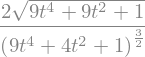

In [127]:
kappa = abs_gamma_prime_times_gamma_double_prime / abs_gamma_prime ** 3
print('kappa = ')
kappa

2. Find the formula calculating the curvature of the parabola $y=x^2$ in terms of $x$. Use it to calculate the curvature at $x=0$ and $x=1$.

gamma' = 


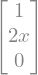

In [144]:
from sympy import *

x = symbols('x')
init_printing()

y = x**2
z = 0

gamma_prime = diff(Matrix([x, y, z]))
print("gamma' = ")
gamma_prime

In [145]:
abs_gamma_prime = sqrt(sum(gamma_prime.applyfunc(lambda e: e**2)))
print("|gamma'| = ")
abs_gamma_prime

|gamma'| = 


In [146]:
gamma_double_prime = diff(gamma_prime)
print("gamma'' = ")
gamma_double_prime

gamma'' = 


In [147]:
gamma_prime_times_gamma_double_prime = gamma_prime.cross(gamma_double_prime)
print("gamma' x gamma'' = ")
gamma_prime_times_gamma_double_prime

gamma' x gamma'' = 


kappa = 


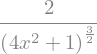

In [148]:
abs_gamma_prime_times_gamma_double_prime = sqrt(sum(gamma_prime_times_gamma_double_prime.applyfunc(lambda e: e**2)))
kappa = abs_gamma_prime_times_gamma_double_prime / abs_gamma_prime ** 3
print('kappa = ')
kappa

In [149]:
print('kappa(0) = ', kappa.subs(x, 0))
print('kappa(1) = ', N(kappa.subs(x, 1), 2))

kappa(0) =  2
kappa(1) =  0.18


3. Find the osculating circle for parabola $y=x^2$ at the origin.

In [155]:
# The radius of the circle is 1 / kappa(0) = 1 / 2 by previous problem.
r = 1 / kappa.subs(x, 0).evalf()
# The center is given by \gamma + 1 / k * N
T = gamma_prime / abs_gamma_prime
B = gamma_prime_times_gamma_double_prime / abs_gamma_prime_times_gamma_double_prime
N = B.cross(T)
# N(0) = (0, 1)

gamma = Matrix([x, y, z])
# gama(0) = (0, 0)
center = (gamma + 1 / kappa * N).subs(x, 0)
# center = (0, 1/2)

# thus the equation of the circle is
# (1/2*cos(t), 1/2*sin(t))

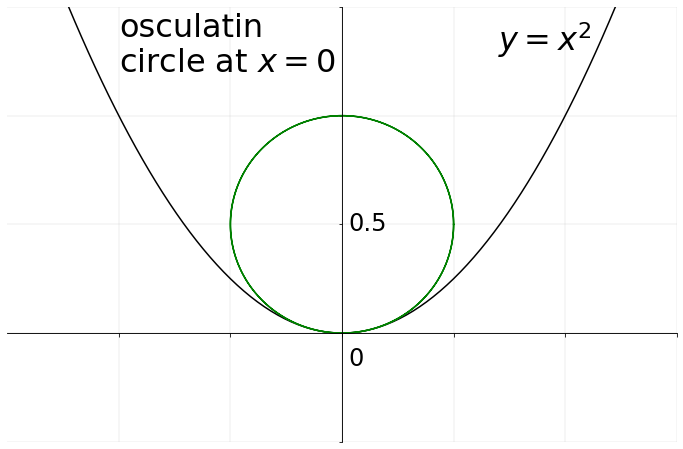

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

x = np.linspace(-1.5, 1.5, 100)
y = x**2

fig, ax = plt.subplots(figsize=(12, 8))

loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)

ax.plot(x, y, 'k')

t = np.linspace(-2*np.pi, 2*np.pi, 300)
x = 1/2*np.cos(t)
y = 1/2*np.sin(t) + 1/2

ax.plot(x, y, 'g')

ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.grid(which='major', linewidth=0.2)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.annotate("$y=x^2$", (0.7, 1.3), fontsize=32)
plt.annotate("0", (0.03, -0.15), fontsize=24)
plt.annotate("0.5", (0.03, 0.47), fontsize=24)
plt.annotate("osculatin\ncircle at $x=0$", (-1.0, 1.2), fontsize=32)
plt.show()

4. Find the Frenet-Serret apparatus for the curve $(\frac{5}{13}\cos{s}, \frac{8}{13}-\sin{s}, \frac{-12}{13}\cos{s})$. Note first that the curve is parametrized by the arc length.

gamma' = 


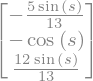

In [223]:
from sympy import *

s = symbols('s')
init_printing()

x, y, z = Rational(5, 13)*cos(s), Rational(8, 13) - sin(s), Rational(-12, 13)*cos(s)

gamma_prime = diff(Matrix([x, y, z]))
print("gamma' = ")
gamma_prime

|gamma'| =  1
T = 


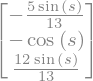

In [227]:
abs_gamma_prime = simplify(sqrt(sum(gamma_prime.applyfunc(lambda e: e**2))))
print("|gamma'| = ", abs_gamma_prime)

T = gamma_prime / abs_gamma_prime
print("T = ")
T

T' = 


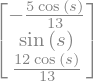

In [229]:
Tprime = diff(T)
print("T' = ")
Tprime

kappa =  1
N = 


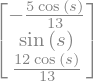

In [232]:
abs_Tprime = simplify(sqrt(sum(Tprime.applyfunc(lambda e: e**2))))
kappa = abs_Tprime
print("kappa = ", kappa)

N = Tprime / kappa
print("N = ")
N

B = 


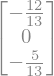

In [234]:
B = simplify(T.cross(N))
print("B = ")
B

In [236]:
Bprime = diff(B, s)
print("B' = ", Bprime)

tau = -Bprime.dot(N)
print("tau = ", tau)

B' =  Matrix([[0], [0], [0]])
tau =  0


5. Find the osculating plane of the curve from the previous problem.

Note that the results from problem 4, $\kappa=1$ and $\tau=0$ tell us that, although not obvious at first, the curve is a circle in a plane. This plane is equal to the osculating plane and so the osculating plane does not depend on the choice of the point on the curve. The vector $\mathbf{B}=(\frac{-12}{13}, 0, \frac{-5}{13})$ is the normal vector of the osculating plane. For the point on the plane, we can use any point on the curve, for example the point corresponding to $s=\pi/2$ (to make the most terms zero) and so we have:

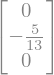

In [237]:
gamma = Matrix([x, y, z])
gamma.subs(s, pi/2)

We obtain the equation of the plane
$$
\frac{-12}{13}(x-0)+0(y+\frac{5}{13})-\frac{5}{13}(z-0)=0\longrightarrow\frac{-12}{13}x-\frac{5}{13}z=0\longrightarrow-12x-5z=0\longrightarrow z=\frac{-12}{5}x
$$

6. Find equation of one of the cylindrical surfaces that intersecting the plane from (5) creates the curve from (4).

One of the simplest solutions is to consider the projections of the curve in $xy$ plane. We obtain the ellipse $x=\frac{5}{13}\cos{s}$ and $y=\frac{8}{13}-\sin{s}$. This ellipse can be described by $\frac{x^2}{(5/13)^2}+(y-\frac{8}{13})^2=1$. This is an ellipse centered at $(0, \frac{8}{13})$ with semiaxes $\frac{5}{13}$ and $1$.

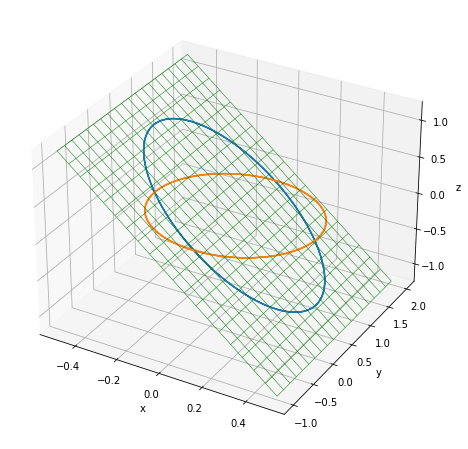

In [246]:
import numpy as np
import matplotlib.pyplot as plt

s = np.linspace(-2*np.pi, 2*np.pi, 100)
x, y, z = 5/13*np.cos(s), 8/13 - np.sin(s), -12/13*np.cos(s)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

ax.plot(x, y, z)

X, Y = np.meshgrid(np.linspace(-0.5, 0.5, 20), np.linspace(-1, 2, 20))
Z = -12/5*X
ax.plot_wireframe(X, Y, Z, color='g', linewidth=0.5)

ax.plot(x, y, np.zeros_like(x))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

7. Find the Frenet-Serret apparatus for the twisted cubic $(t,t^2,t^3)$.

gamma' = 


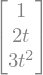

In [247]:
from sympy import *

t = symbols('t')
init_printing()

x, y, z = t, t**2, t**3

gamma = Matrix([x, y, z])
gamma_prime = diff(gamma)
print("gamma' = ")
gamma_prime

In [248]:
abs_gamma_prime = sqrt(sum(gamma_prime.applyfunc(lambda e: e**2)))
print("|gamma'| = ")
abs_gamma_prime

|gamma'| = 


gamma' x gamma'' = 


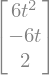

In [249]:
gamma_double_prime = diff(gamma_prime)
gamma_prime_times_gamma_double_prime = gamma_prime.cross(gamma_double_prime)
print("gamma' x gamma'' = ")
gamma_prime_times_gamma_double_prime

In [250]:
abs_gamma_prime_times_gamma_double_prime = simplify(sqrt(sum(gamma_prime_times_gamma_double_prime.applyfunc(lambda e: e**2))))
print("|gamma' x gamma''| = ")
abs_gamma_prime_times_gamma_double_prime

|gamma' x gamma''| = 


kappa = 


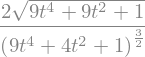

In [251]:
kappa = abs_gamma_prime_times_gamma_double_prime / abs_gamma_prime**3
print("kappa = ")
kappa

T = 


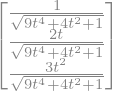

In [252]:
T = gamma_prime / abs_gamma_prime
print("T = ")
T

B = 


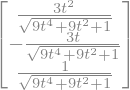

In [253]:
B = gamma_prime_times_gamma_double_prime / abs_gamma_prime_times_gamma_double_prime
print("B = ")
B

N = 


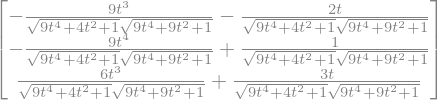

In [254]:
N = B.cross(T)
print("N = ")
N

In [255]:
gamma_triple_prime = diff(gamma_double_prime)
print("gamma''' = ")
gamma_triple_prime

gamma''' = 


tau = 


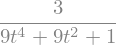

In [257]:
tau = simplify(gamma_prime_times_gamma_double_prime.dot(gamma_triple_prime) / abs_gamma_prime_times_gamma_double_prime**2)
print("tau = ")
tau